# 🧪 Experiments Finals – DWTFormer-TFG

Aquest notebook executa l'entrenament i l'avaluació del model `DWTFormer` sobre els tres datasets de MedMNIST:
- `PathMNIST`
- `ChestMNIST`
- `OrganMNIST`

Els resultats inclouen:
- Entrenament per dataset
- Pèrdua i mètriques (F1, accuracy)
- Matriu de confusió
- Corbes ROC
- Guarda resultats a `annexos/metrics/{dataset}/`


In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


# Imports habituals
import torch
import torch.nn as nn
# import torch.optim as optim
import matplotlib.pyplot as plt
import torch.optim as optim

from src.data.dataset_loader import load_medmnist_dataset
from src.model.dwtformer import DWTFormer
from src.train.train_model import train
from src.train.evaluate import evaluate_model, plot_confusion, plot_multiclass_roc, print_f1_per_class



In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATE = 1e-4

NUM_CLASSES = {
    "pathmnist": 9,
    "chestmnist": 14,
    "organamnist": 11
}

DATASETS = ["pathmnist", "chestmnist", "organamnist"]

In [9]:
# DEBUG: comprovar shape i tipus de les etiquetes segons el dataset
for dataset in DATASETS:
    print(f"\n📁 Revisant {dataset.upper()}")
    train_loader, val_loader, test_loader = load_medmnist_dataset(dataset, batch_size=8)

    images, labels = next(iter(train_loader))
    print(f"Shape imatges: {images.shape}")
    print(f"Shape etiquetes: {labels.shape}")
    print(f"Tipus de dades de labels: {labels.dtype}")
    print(f"Primera etiqueta: {labels[0]}")



📁 Revisant PATHMNIST
Shape imatges: torch.Size([8, 1, 28, 28])
Shape etiquetes: torch.Size([8, 1])
Tipus de dades de labels: torch.int64
Primera etiqueta: tensor([1])

📁 Revisant CHESTMNIST
Shape imatges: torch.Size([8, 1, 28, 28])
Shape etiquetes: torch.Size([8, 14])
Tipus de dades de labels: torch.int64
Primera etiqueta: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

📁 Revisant ORGANAMNIST
Shape imatges: torch.Size([8, 1, 28, 28])
Shape etiquetes: torch.Size([8, 1])
Tipus de dades de labels: torch.int64
Primera etiqueta: tensor([10])


In [14]:
from medmnist import INFO

print("📚 Datasets disponibles a MedMNIST:")
for key in INFO.keys():
    print(f" - {key}")


📚 Datasets disponibles a MedMNIST:
 - pathmnist
 - chestmnist
 - dermamnist
 - octmnist
 - pneumoniamnist
 - retinamnist
 - breastmnist
 - bloodmnist
 - tissuemnist
 - organamnist
 - organcmnist
 - organsmnist
 - organmnist3d
 - nodulemnist3d
 - adrenalmnist3d
 - fracturemnist3d
 - vesselmnist3d
 - synapsemnist3d



📁 Processant PATHMNIST
🔍 Dataset: pathmnist | Multilabel: False | Loss: CrossEntropyLoss


📘 Epoch 1/20 | Train Loss: 1.6248 | Val Loss: 1.5045 | Val Acc: 44.96%


📘 Epoch 2/20 | Train Loss: 1.3501 | Val Loss: 1.2226 | Val Acc: 54.74%


📘 Epoch 3/20 | Train Loss: 1.2014 | Val Loss: 1.1350 | Val Acc: 58.03%


📘 Epoch 4/20 | Train Loss: 1.1286 | Val Loss: 1.0743 | Val Acc: 60.04%


📘 Epoch 5/20 | Train Loss: 1.0725 | Val Loss: 1.0430 | Val Acc: 61.76%


📘 Epoch 6/20 | Train Loss: 1.0323 | Val Loss: 1.0221 | Val Acc: 62.31%


📘 Epoch 7/20 | Train Loss: 0.9960 | Val Loss: 0.9934 | Val Acc: 63.76%


📘 Epoch 8/20 | Train Loss: 0.9642 | Val Loss: 0.9723 | Val Acc: 64.24%


📘 Epoch 9/20 | Train Loss: 0.9358 | Val Loss: 0.9692 | Val Acc: 64.55%


📘 Epoch 10/20 | Train Loss: 0.9103 | Val Loss: 0.9492 | Val Acc: 65.31%


📘 Epoch 11/20 | Train Loss: 0.8895 | Val Loss: 0.9469 | Val Acc: 65.49%


📘 Epoch 12/20 | Train Loss: 0.8667 | Val Loss: 0.9660 | Val Acc: 65.06%


📘 Epoch 13/20 | Train Loss: 0.8412 | Val Loss: 0.9186 | Val Acc: 66.59%


📘 Epoch 14/20 | Train Loss: 0.8201 | Val Loss: 0.9366 | Val Acc: 66.29%


📘 Epoch 15/20 | Train Loss: 0.7975 | Val Loss: 0.9172 | Val Acc: 67.19%


📘 Epoch 16/20 | Train Loss: 0.7731 | Val Loss: 0.9412 | Val Acc: 66.12%


📘 Epoch 17/20 | Train Loss: 0.7501 | Val Loss: 0.9196 | Val Acc: 67.23%


📘 Epoch 18/20 | Train Loss: 0.7231 | Val Loss: 0.9129 | Val Acc: 67.64%


📘 Epoch 19/20 | Train Loss: 0.7020 | Val Loss: 0.9033 | Val Acc: 67.70%


📘 Epoch 20/20 | Train Loss: 0.6754 | Val Loss: 0.9100 | Val Acc: 68.03%
✅ Model desat a model/dwtformer_pathmnist.pt

📁 Processant CHESTMNIST
🔍 Dataset: chestmnist | Multilabel: True | Loss: BCEWithLogitsLoss


📘 Epoch 1/20 | Train Loss: 0.1876 | Val Loss: 0.1757 | Val Acc: 0.00%


📘 Epoch 2/20 | Train Loss: 0.1741 | Val Loss: 0.1720 | Val Acc: 0.00%


📘 Epoch 3/20 | Train Loss: 0.1716 | Val Loss: 0.1722 | Val Acc: 0.00%


📘 Epoch 4/20 | Train Loss: 0.1703 | Val Loss: 0.1703 | Val Acc: 0.00%


📘 Epoch 5/20 | Train Loss: 0.1692 | Val Loss: 0.1698 | Val Acc: 0.00%


📘 Epoch 6/20 | Train Loss: 0.1682 | Val Loss: 0.1685 | Val Acc: 0.00%


📘 Epoch 7/20 | Train Loss: 0.1674 | Val Loss: 0.1680 | Val Acc: 0.00%


📘 Epoch 8/20 | Train Loss: 0.1664 | Val Loss: 0.1671 | Val Acc: 0.00%


📘 Epoch 9/20 | Train Loss: 0.1655 | Val Loss: 0.1668 | Val Acc: 0.00%


📘 Epoch 10/20 | Train Loss: 0.1649 | Val Loss: 0.1672 | Val Acc: 0.00%


📘 Epoch 11/20 | Train Loss: 0.1642 | Val Loss: 0.1657 | Val Acc: 0.00%


📘 Epoch 12/20 | Train Loss: 0.1634 | Val Loss: 0.1660 | Val Acc: 0.00%


📘 Epoch 13/20 | Train Loss: 0.1627 | Val Loss: 0.1657 | Val Acc: 0.00%


📘 Epoch 14/20 | Train Loss: 0.1619 | Val Loss: 0.1650 | Val Acc: 0.00%


📘 Epoch 15/20 | Train Loss: 0.1613 | Val Loss: 0.1651 | Val Acc: 0.00%


📘 Epoch 16/20 | Train Loss: 0.1605 | Val Loss: 0.1655 | Val Acc: 0.00%


📘 Epoch 17/20 | Train Loss: 0.1598 | Val Loss: 0.1645 | Val Acc: 0.00%


📘 Epoch 18/20 | Train Loss: 0.1590 | Val Loss: 0.1651 | Val Acc: 0.00%


📘 Epoch 19/20 | Train Loss: 0.1582 | Val Loss: 0.1647 | Val Acc: 0.00%


📘 Epoch 20/20 | Train Loss: 0.1575 | Val Loss: 0.1644 | Val Acc: 0.00%
✅ Model desat a model/dwtformer_chestmnist.pt

📁 Processant ORGANAMNIST
🔍 Dataset: organamnist | Multilabel: False | Loss: CrossEntropyLoss


📘 Epoch 1/20 | Train Loss: 1.0914 | Val Loss: 0.6377 | Val Acc: 78.72%


📘 Epoch 2/20 | Train Loss: 0.5909 | Val Loss: 0.4783 | Val Acc: 83.99%


📘 Epoch 3/20 | Train Loss: 0.4485 | Val Loss: 0.3666 | Val Acc: 88.01%


📘 Epoch 4/20 | Train Loss: 0.3511 | Val Loss: 0.2941 | Val Acc: 90.34%


📘 Epoch 5/20 | Train Loss: 0.2862 | Val Loss: 0.2449 | Val Acc: 91.96%


📘 Epoch 6/20 | Train Loss: 0.2380 | Val Loss: 0.2067 | Val Acc: 93.49%


📘 Epoch 7/20 | Train Loss: 0.2007 | Val Loss: 0.1658 | Val Acc: 94.69%


📘 Epoch 8/20 | Train Loss: 0.1709 | Val Loss: 0.1627 | Val Acc: 94.92%


📘 Epoch 9/20 | Train Loss: 0.1484 | Val Loss: 0.1431 | Val Acc: 95.47%


📘 Epoch 10/20 | Train Loss: 0.1200 | Val Loss: 0.1393 | Val Acc: 95.62%


📘 Epoch 11/20 | Train Loss: 0.1120 | Val Loss: 0.1254 | Val Acc: 96.20%


📘 Epoch 12/20 | Train Loss: 0.0965 | Val Loss: 0.1182 | Val Acc: 96.33%


📘 Epoch 13/20 | Train Loss: 0.0855 | Val Loss: 0.1240 | Val Acc: 96.30%


📘 Epoch 14/20 | Train Loss: 0.0794 | Val Loss: 0.1110 | Val Acc: 96.53%


📘 Epoch 15/20 | Train Loss: 0.0708 | Val Loss: 0.0970 | Val Acc: 97.06%


📘 Epoch 16/20 | Train Loss: 0.0604 | Val Loss: 0.1047 | Val Acc: 97.02%


📘 Epoch 17/20 | Train Loss: 0.0579 | Val Loss: 0.0899 | Val Acc: 97.27%


📘 Epoch 18/20 | Train Loss: 0.0529 | Val Loss: 0.1008 | Val Acc: 97.24%


📘 Epoch 19/20 | Train Loss: 0.0478 | Val Loss: 0.0784 | Val Acc: 97.92%


📘 Epoch 20/20 | Train Loss: 0.0447 | Val Loss: 0.0871 | Val Acc: 97.66%
✅ Model desat a model/dwtformer_organamnist.pt

📊 Resultats per ORGANAMNIST
Test Loss: 1.0471
🔎 F1-score per classe:

              precision    recall  f1-score   support

           0     0.7779    0.7336    0.7551      1036
           1     0.8845    0.7908    0.8350       784
           2     0.7816    0.8348    0.8073       793
           3     0.9035    0.7516    0.8206       785
           4     0.6547    0.6211    0.6375      2064
           5     0.6814    0.6748    0.6781      1965
           6     0.8839    0.9522    0.9168      3285
           7     0.9603    0.9147    0.9370      1747
           8     0.9316    0.9013    0.9162      1813
           9     0.7557    0.6387    0.6923      1622
          10     0.5954    0.7484    0.6632      1884

    accuracy                         0.7901     17778
   macro avg     0.8010    0.7784    0.7872     17778
weighted avg     0.7952    0.7901    0.7904     1777

<Figure size 640x480 with 0 Axes>

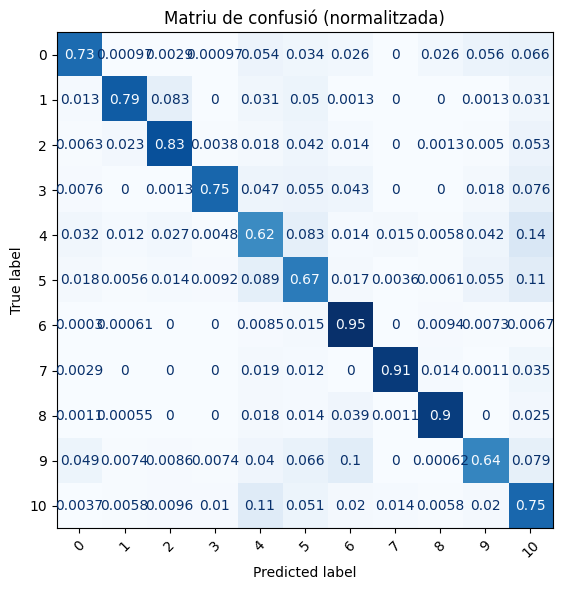

<Figure size 640x480 with 0 Axes>

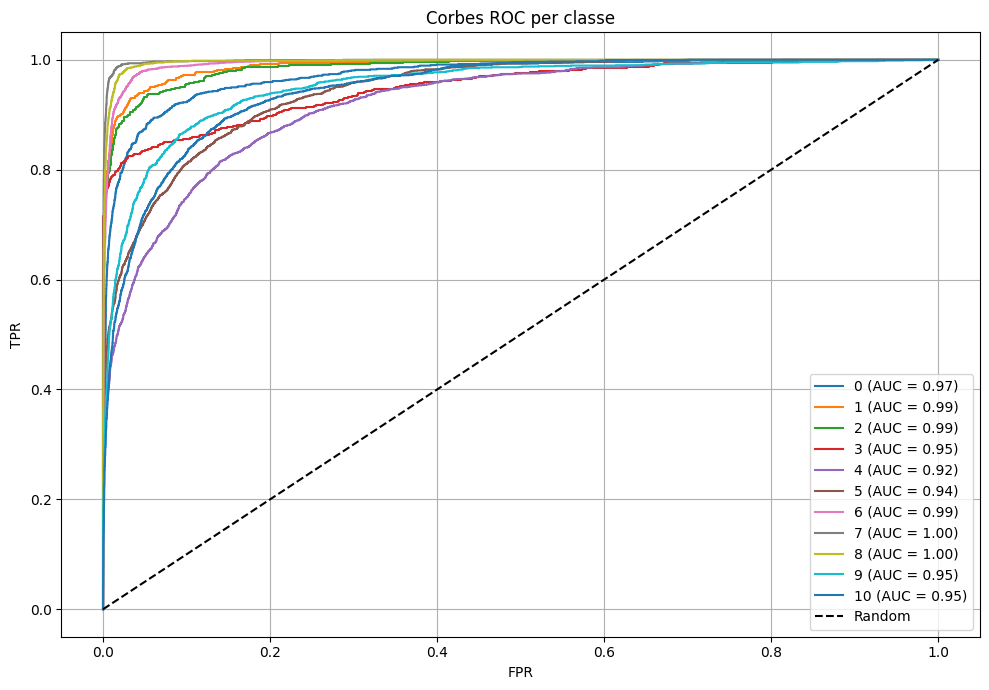

✅ Resultats guardats per organamnist



In [3]:
for dataset in DATASETS:
    print(f"\n📁 Processant {dataset.upper()}")

    # 🔍 Decideix el tipus de pèrdua segons el dataset
    if dataset == "chestmnist":
        criterion = nn.BCEWithLogitsLoss()
        multilabel = True
    else:
        criterion = nn.CrossEntropyLoss()
        multilabel = False

    # Carregar dades (🔧 això era el que faltava!)
    train_loader, val_loader, test_loader = load_medmnist_dataset(dataset, batch_size=BATCH_SIZE)

    # Crear model i optimitzador
    model = DWTFormer(num_classes=NUM_CLASSES[dataset]).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    print(f"🔍 Dataset: {dataset} | Multilabel: {multilabel} | Loss: {type(criterion).__name__}")

    history = train(
        model, train_loader, val_loader, criterion, optimizer,
        num_epochs=NUM_EPOCHS,
        device=DEVICE,
        save_path=f"model/dwtformer_{dataset}.pt",
        multilabel=multilabel
    )

   # Avaluació
test_loss, y_true, y_pred, y_scores = evaluate_model(
    model, test_loader, criterion, DEVICE, multilabel=multilabel
)
print(f"\n📊 Resultats per {dataset.upper()}")
print(f"Test Loss: {test_loss:.4f}")
print_f1_per_class(y_true, y_pred, class_names=[str(i) for i in range(NUM_CLASSES[dataset])])

# Visualització només si és multiclasse
if not multilabel:
    # Matriu de confusió
    fig1 = plt.figure()
    plot_confusion(y_true, y_pred, class_names=[str(i) for i in range(NUM_CLASSES[dataset])])
    fig1.savefig(f"annexos/metrics/{dataset}/confusion_matrix.png")
    plt.close(fig1)

    # Corba ROC
    fig2 = plt.figure()
    plot_multiclass_roc(
        y_true, y_scores,
        n_classes=NUM_CLASSES[dataset],
        class_names=[str(i) for i in range(NUM_CLASSES[dataset])]
    )
    fig2.savefig(f"annexos/metrics/{dataset}/roc_curve_multiclass.png")
    plt.close(fig2)

print(f"✅ Resultats guardats per {dataset}\n")
